In [2]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt


In [133]:

def update_state(state: NDArray, rules: dict[int, int]) -> NDArray:
    state_size = state.shape[0]
    new_state = np.zeros(state_size, dtype=state.dtype)
    for i in range(state_size):
        # # boundary conditions: 0 on the left, 0 on the right
        # value = [0, 0, 0]
        # if i > 0:
        #     value[0] = state[i - 1]
        # value[1] = state[i]
        # if i < state_size - 1:
        #     value[2] = state[i + 1]
        # value = ''.join([str(1 if x else 0) for x in value])

        # boundary conditions: wrap around
        value = [state[(i - 1) % state_size], state[i], state[(i + 1) % state_size]]
        value = ''.join([str(1 if x else 0) for x in value])


        new_state[i] = rules.get(int(value, 2), 0)
    return new_state

def run(n_steps: int, state: NDArray, rules: dict[int, int]) -> NDArray:
    states = [state]
    for i in range(n_steps):
        state = update_state(state, rules)
        states.append(state)
    return np.array(states)

def rules_from_wolfram(code: int) -> dict[int, int]:
    rules = {}
    for i in range(8):
        rules[i] = (code >> i) & 1
    return rules


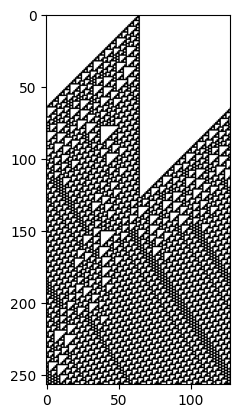

In [132]:
state_size = 128

# State really just needs a single bit of information, but we'll use a byte for simplicity
state = np.zeros(state_size, dtype=np.int8)
# state[state_size - 1] = 1
state[state_size // 2] = 1
# state = np.random.random(size=state_size) < 0.1

# print(rules_from_wolfram(225))


out = run(256, state, rules_from_wolfram(110))
plt.imshow(1.0 - out, cmap='gray')
plt.show()